In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


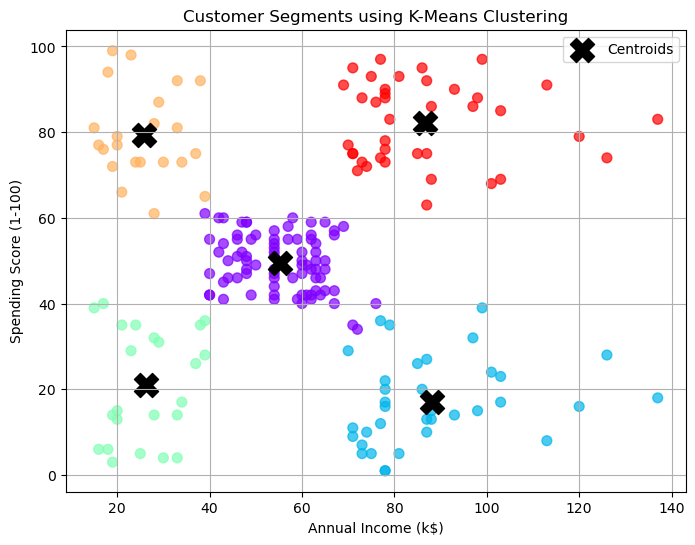

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=clusters, cmap='rainbow', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments using K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

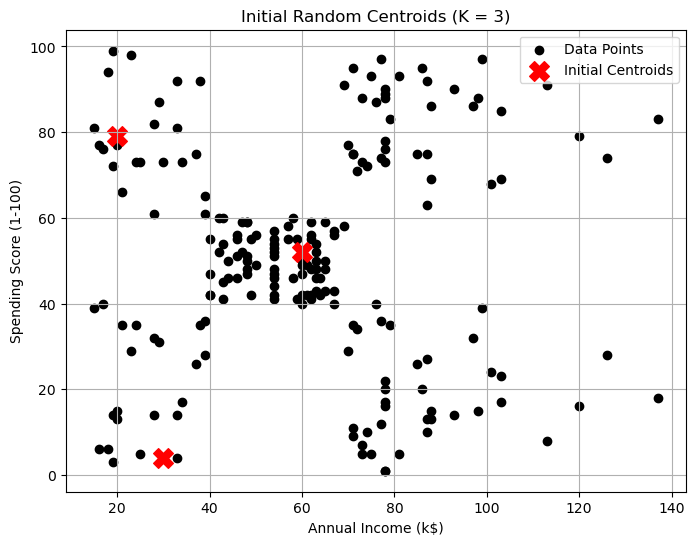

In [6]:
K = 3
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
Centroids = X.sample(n=K, random_state=42)  


plt.figure(figsize=(8, 6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black', label='Data Points')


plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], 
            c='red', marker='X', s=200, label='Initial Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Initial Random Centroids (K = 3)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:

X = data[["Annual Income (k$)", "Spending Score (1-100)"]].copy()

K = 3
Centroids = X.sample(n=K, random_state=42)
diff = 1
j = 0
while diff != 0:
    XD = X.copy()
    for i, (_, row_c) in enumerate(Centroids.iterrows(), start=1):
        distances = []
        for _, row_d in XD.iterrows():
            d1 = (row_c["Annual Income (k$)"] - row_d["Annual Income (k$)"]) ** 2
            d2 = (row_c["Spending Score (1-100)"] - row_d["Spending Score (1-100)"]) ** 2
            d = np.sqrt(d1 + d2)
            distances.append(d)
        X.loc[:, i] = distances  
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    X["Cluster"] = C
    Centroids_new = X.groupby("Cluster").mean()[["Annual Income (k$)", "Spending Score (1-100)"]]
    if j == 0:
        diff = 1
        j += 1
    else:
        diff = (Centroids_new["Annual Income (k$)"] - Centroids["Annual Income (k$)"]).sum() + \
               (Centroids_new["Spending Score (1-100)"] - Centroids["Spending Score (1-100)"]).sum()
        print("Difference:", diff)

    Centroids = Centroids_new

Difference: 7.160755022826514
Difference: 5.8595158464723625
Difference: 3.9071890379377194
Difference: 5.667994112245438
Difference: 4.252827292533173
Difference: 7.552098875376235
Difference: 7.427971804028758
Difference: 12.221730653705642
Difference: 15.265002787546962
Difference: 7.805701599166802
Difference: 1.7888311434286166
Difference: 2.913448759480694
Difference: 4.207769598394311
Difference: 0.07160293777226201
Difference: 0.0
